# **Data Loading**

In [1]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv("DailyDelhiClimateTrain.csv")
test_data = pd.read_csv("DailyDelhiClimateTest.csv")

# Display the first few rows of each dataset
print("Training Data:\n", train_data.head())
print("\nTesting Data:\n", test_data.head())

Training Data:
          date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

Testing Data:
          date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333


In [2]:
# Check data types, missing values, and column information
print("Training Data Info:")
print(train_data.info())
print("\nTesting Data Info:")
print(test_data.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None

Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None


In [3]:
# Summary statistics for training and testing data
print("Training Data Summary:\n", train_data.describe())
print("\nTesting Data Summary:\n", test_data.describe())

Training Data Summary:
           meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333

Testing Data Summary:
          meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.035090
std      6.360072   19.068083    3.588049     89.474692
min     11.000000   17.750000    1.387500     59.000000
25%     16.437198   39.625000    5.563542   1007.437500
50%     19.875000   57.750000    8.069444   1012.739316
75%     27.705357   71.902778

# **EDA**

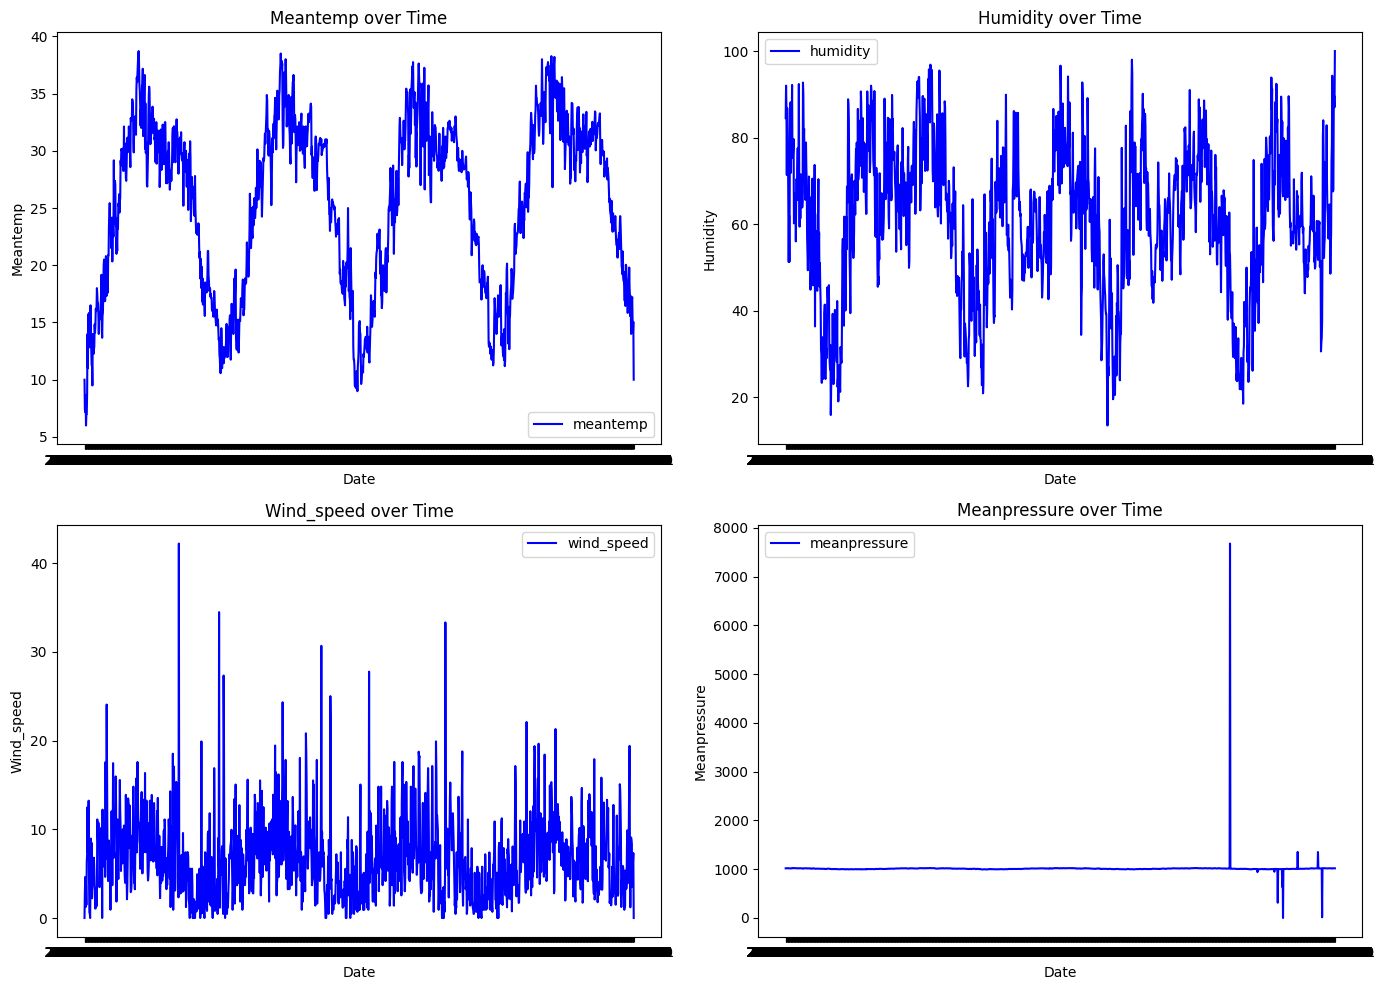

In [4]:
import matplotlib.pyplot as plt

# Plot each feature over time in the training dataset
features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
plt.figure(figsize=(14, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.plot(train_data['date'], train_data[feature], label=feature, color="b")
    plt.title(f"{feature.capitalize()} over Time")
    plt.xlabel("Date")
    plt.ylabel(feature.capitalize())
    plt.legend()

plt.tight_layout()
plt.show()

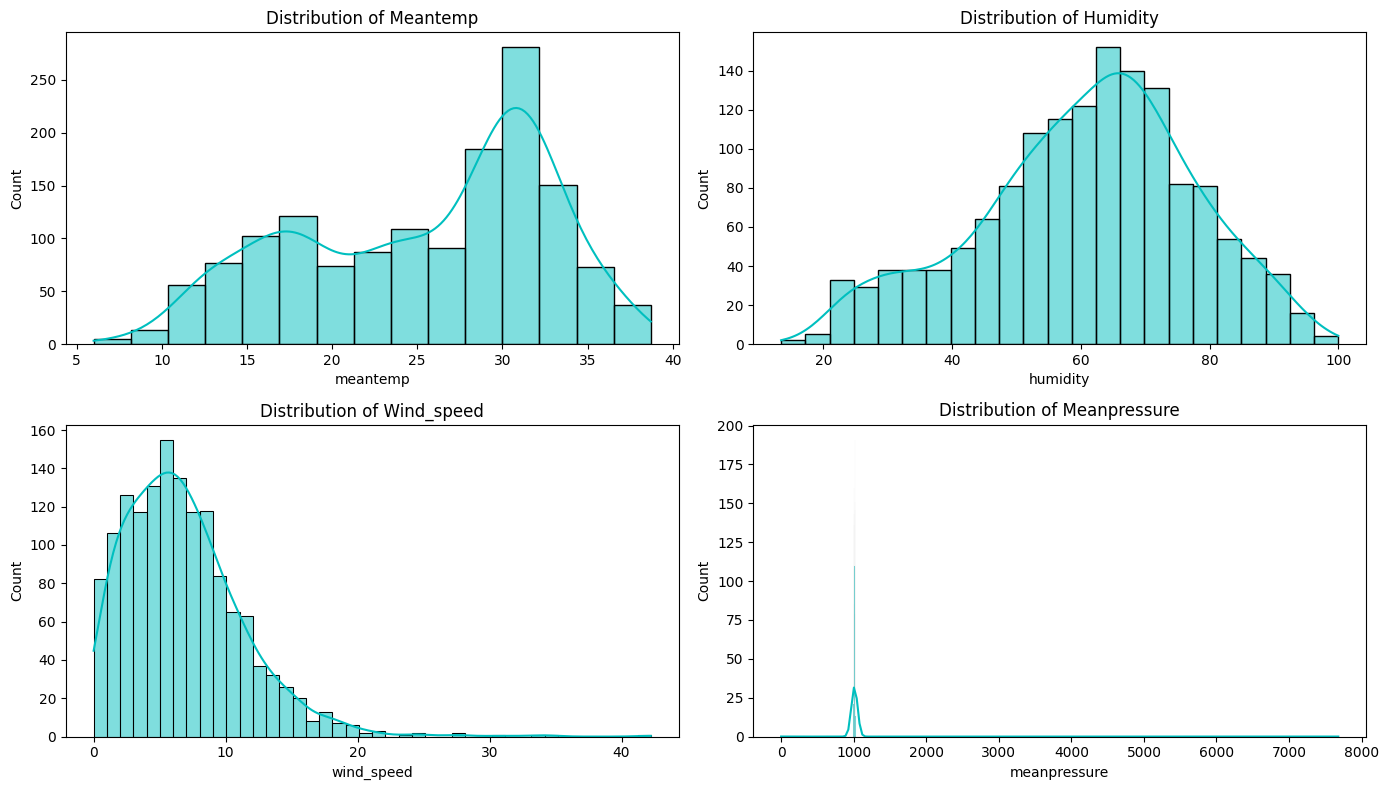

In [5]:
import seaborn as sns

# Plot the distribution of each feature
plt.figure(figsize=(14, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train_data[feature], kde=True, color="c")
    plt.title(f"Distribution of {feature.capitalize()}")

plt.tight_layout()
plt.show()

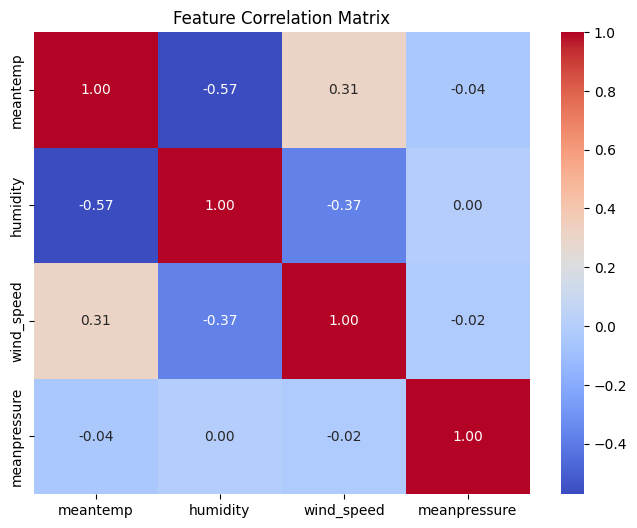

In [6]:
# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(train_data[features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

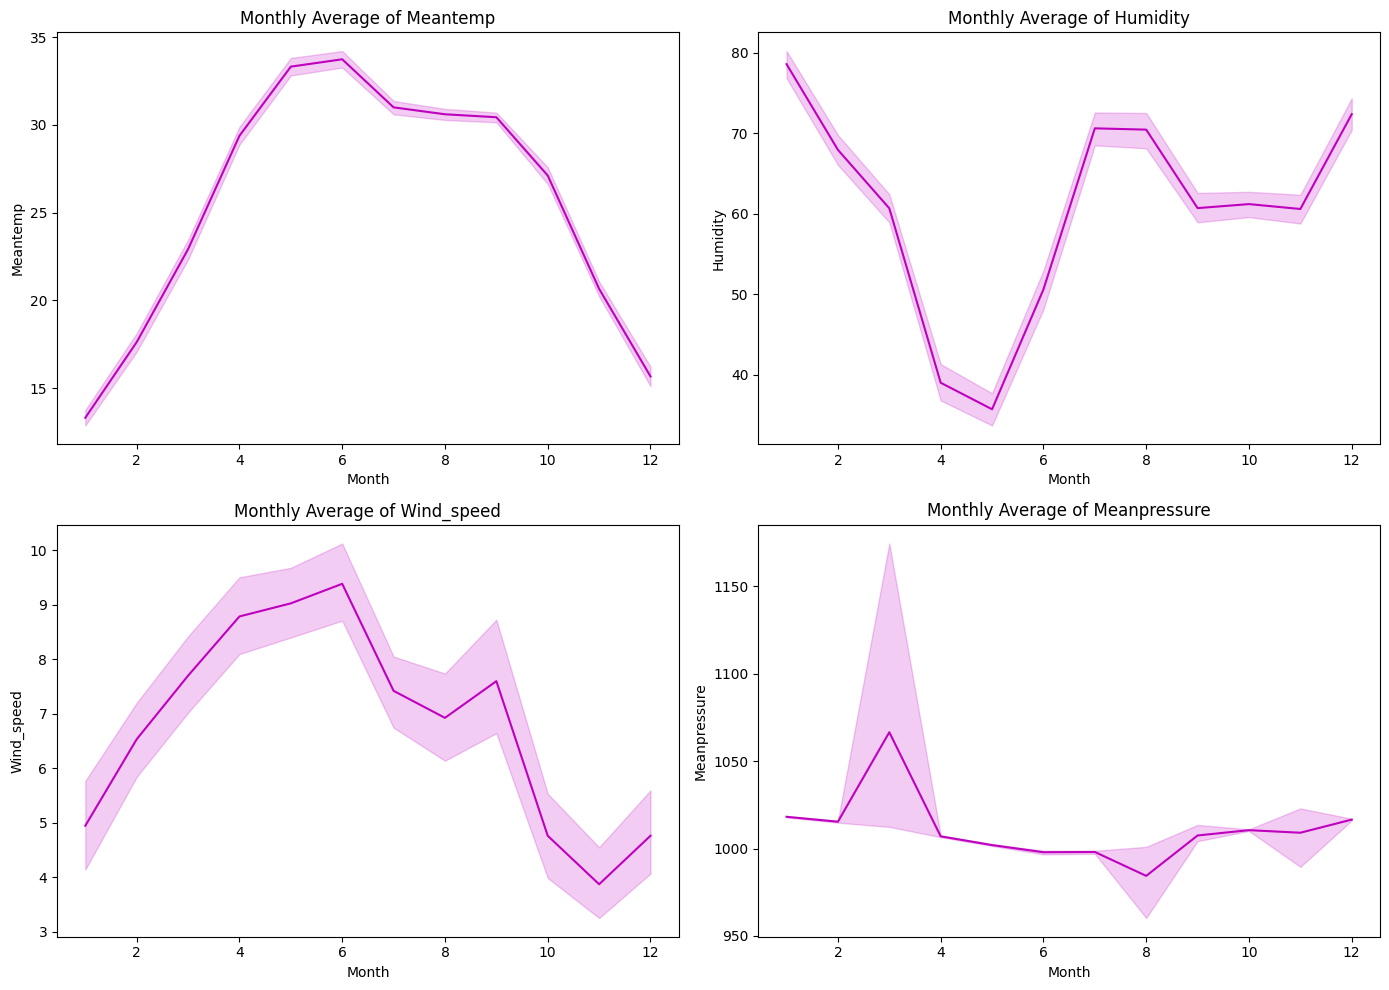

In [7]:
# Convert 'date' column to datetime format
train_data['date'] = pd.to_datetime(train_data['date'], errors='coerce')

# If the conversion is successful, proceed with extracting the month
train_data['month'] = train_data['date'].dt.month

# Now plot the monthly averages
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=train_data, x="month", y=feature, estimator='mean', color="m")
    plt.title(f"Monthly Average of {feature.capitalize()}")
    plt.xlabel("Month")
    plt.ylabel(f"{feature.capitalize()}")

plt.tight_layout()
plt.show()

# **Data Pre Processing**

In [8]:
import numpy as np

# Cap meanpressure and wind_speed within the 1st and 99th percentiles
pressure_cap = np.percentile(train_data['meanpressure'], [1, 99])
wind_speed_cap = np.percentile(train_data['wind_speed'], [1, 99])

train_data['meanpressure'] = np.clip(train_data['meanpressure'], *pressure_cap)
train_data['wind_speed'] = np.clip(train_data['wind_speed'], *wind_speed_cap)

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Apply scaler to training and testing data (fit on training, transform on both)
features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
train_data[features] = scaler.fit_transform(train_data[features])
test_data[features] = scaler.transform(test_data[features])

In [10]:
import numpy as np

def create_sequences(data, seq_length=30):
    sequences = []
    labels = []

    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length]
        label = data[i + seq_length, 0]  # Using meantemp as the label for simplicity
        sequences.append(sequence)
        labels.append(label)

    return np.array(sequences), np.array(labels)

# Convert training and test data to numpy arrays for easier manipulation
train_array = train_data[features].values
test_array = test_data[features].values

# Create sequences with a window of 30 days (you can adjust the window size)
X_train, y_train = create_sequences(train_array, seq_length=30)
X_test, y_test = create_sequences(test_array, seq_length=30)

# **Model Configuration**

In [11]:
# Model configurations
model_configs = [
    # Stacked LSTM models with varying units
    {"type": "LSTM", "units": 32, "num_layers": 2, "dropout": 0.2},
    {"type": "LSTM", "units": 64, "num_layers": 2, "dropout": 0.3},
    {"type": "LSTM", "units": 128, "num_layers": 2, "dropout": 0.4},
    {"type": "LSTM", "units": 32, "num_layers": 3, "dropout": 0.2},
    {"type": "LSTM", "units": 64, "num_layers": 3, "dropout": 0.3},

    # CNN + Stacked LSTM models
    {"type": "CNN+LSTM", "units": 32, "num_layers": 2, "dropout": 0.2},
    {"type": "CNN+LSTM", "units": 64, "num_layers": 2, "dropout": 0.3},
    {"type": "CNN+LSTM", "units": 128, "num_layers": 2, "dropout": 0.4},
    {"type": "CNN+LSTM", "units": 64, "num_layers": 3, "dropout": 0.3},
    {"type": "CNN+LSTM", "units": 128, "num_layers": 3, "dropout": 0.4},
]

# **Model Building**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Input

def build_model(model_type, units, num_layers, dropout):
    model = Sequential()
    input_shape = (X_train.shape[1], X_train.shape[2])  # Adjust this based on your data shape

    # Add LSTM layers
    for layer in range(num_layers):
        if layer == 0:
            model.add(LSTM(units, return_sequences=True, input_shape=input_shape))
        elif layer == num_layers - 1:
            model.add(LSTM(units))  # Last layer without return_sequences
        else:
            model.add(LSTM(units, return_sequences=True))

        # Add dropout layer after each LSTM layer
        model.add(Dropout(dropout))

    # Add output layer
    model.add(Dense(1))  # Change 1 to the number of output neurons if predicting multiple outputs

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    print(model.summary())
    return model


# **Model Training**

In [13]:
# Initialize lists to store metrics, histories, models, and predictions
model_histories = []
model_mae_scores = []
trained_models = []  # List to store trained models
model_predictions = []  # List to store predictions from each model

# Using the test set for validation
for i, config in enumerate(model_configs):
    print(f"Training model {i+1} - {config['type']} with units: {config['units']}, layers: {config['num_layers']}")

    # Build the model using the specified configuration
    model = build_model(config["type"], units=config["units"], num_layers=config["num_layers"], dropout=config["dropout"])

    # Fit the model on the training data and validate on the test data
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=True)

    # Save metrics and training history
    val_mae = history.history['val_mae'][-1]
    model_histories.append(history)
    model_mae_scores.append(val_mae)
    trained_models.append(model)  # Store the trained model

    # Make predictions and store them
    predictions = model.predict(X_test)
    model_predictions.append(predictions)

    print(f"Completed Model {i+1}: Validation MAE = {val_mae}")

Training model 1 - LSTM with units: 32, layers: 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 32)              │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,089 (51.13 KB)

 Trainable params: 13,089 (51.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.1414 - mae: 0.2870 - val_loss: 0.0076 - val_mae: 0.0742
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0121 - mae: 0.0874 - val_loss: 0.0067 - val_mae: 0.0707
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0108 - mae: 0.0818 - val_loss: 0.0068 - val_mae: 0.0701
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0097 - mae: 0.0786 - val_loss: 0.0065 - val_mae: 0.0700
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0095 - mae: 0.0765 - val_loss: 0.0063 - val_mae: 0.0682
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0094 - mae: 0.0759 - val_loss: 0.0063 - val_mae: 0.0677
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mae: 0.0774 - val_loss: 0.0064 - val_mae: 0.0680
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mae: 0.0728 - val_loss: 0.0061 - val_mae: 0.0664
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - l

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 30, 64)              │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,753 (198.25 KB)

 Trainable params: 50,753 (198.25 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1429 - mae: 0.2793 - val_loss: 0.0082 - val_mae: 0.0791
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112 - mae: 0.0841 - val_loss: 0.0071 - val_mae: 0.0716
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113 - mae: 0.0827 - val_loss: 0.0074 - val_mae: 0.0740
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0094 - mae: 0.0761 - val_loss: 0.0070 - val_mae: 0.0693
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mae: 0.0769 - val_loss: 0.0067 - val_mae: 0.0689
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0085 - mae: 0.0726 - val_loss: 0.0065 - val_mae: 0.0665
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0090 - mae: 0.0753 - val_loss: 0.0064 - val_mae: 0.0683
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0079 - mae: 0.0703 - val_loss: 0.0069 - val_mae: 0.0702
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - los

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 30, 128)             │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199,809 (780.50 KB)

 Trainable params: 199,809 (780.50 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0924 - mae: 0.2197 - val_loss: 0.0069 - val_mae: 0.0707
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0104 - mae: 0.0802 - val_loss: 0.0067 - val_mae: 0.0702
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0086 - mae: 0.0731 - val_loss: 0.0064 - val_mae: 0.0682
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0100 - mae: 0.0786 - val_loss: 0.0066 - val_mae: 0.0716
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0078 - mae: 0.0700 - val_loss: 0.0062 - val_mae: 0.0655
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0080 - mae: 0.0705 - val_loss: 0.0061 - val_mae: 0.0673
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0076 - mae: 0.0686 - val_loss: 0.0064 - val_mae: 0.0682
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0081 - mae: 0.0715 - val_loss: 0.0058 - val_mae: 0.0644
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - lo

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Completed Model 3: Validation MAE = 0.04685044661164284
Training model 4 - LSTM with units: 32, layers: 3


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 30, 32)              │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 30, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,409 (83.63 KB)

 Trainable params: 21,409 (83.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1463 - mae: 0.2951 - val_loss: 0.0076 - val_mae: 0.0709
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0172 - mae: 0.1021 - val_loss: 0.0076 - val_mae: 0.0721
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0132 - mae: 0.0891 - val_loss: 0.0076 - val_mae: 0.0719
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0115 - mae: 0.0851 - val_loss: 0.0081 - val_mae: 0.0745
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0109 - mae: 0.0822 - val_loss: 0.0077 - val_mae: 0.0738
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0103 - mae: 0.0818 - val_loss: 0.0076 - val_mae: 0.0725
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0101 - mae: 0.0798 - val_loss: 0.0076 - val_mae: 0.0726
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0096 - mae: 0.0776 - val_loss: 0.0080 - val_mae: 0.0720
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 30, 64)              │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 30, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,777 (327.25 KB)

 Trainable params: 83,777 (327.25 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0952 - mae: 0.2252 - val_loss: 0.0080 - val_mae: 0.0757
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0124 - mae: 0.0877 - val_loss: 0.0079 - val_mae: 0.0744
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0114 - mae: 0.0840 - val_loss: 0.0082 - val_mae: 0.0782
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0106 - mae: 0.0816 - val_loss: 0.0078 - val_mae: 0.0735
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0101 - mae: 0.0781 - val_loss: 0.0082 - val_mae: 0.0779
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0085 - mae: 0.0737 - val_loss: 0.0077 - val_mae: 0.0749
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0086 - mae: 0.0753 - val_loss: 0.0098 - val_mae: 0.0817
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0093 - mae: 0.0755 - val_loss: 0.0078 - val_mae: 0.0747
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step -

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 30, 32)              │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,089 (51.13 KB)

 Trainable params: 13,089 (51.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0964 - mae: 0.2362 - val_loss: 0.0079 - val_mae: 0.0753
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0147 - mae: 0.0978 - val_loss: 0.0087 - val_mae: 0.0752
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0128 - mae: 0.0890 - val_loss: 0.0077 - val_mae: 0.0742
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0117 - mae: 0.0837 - val_loss: 0.0071 - val_mae: 0.0717
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0099 - mae: 0.0786 - val_loss: 0.0071 - val_mae: 0.0715
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0097 - mae: 0.0764 - val_loss: 0.0070 - val_mae: 0.0704
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0094 - mae: 0.0767 - val_loss: 0.0074 - val_mae: 0.0705
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0087 - mae: 0.0734 - val_loss: 0.0068 - val_mae: 0.0706
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - 

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 30, 64)              │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,753 (198.25 KB)

 Trainable params: 50,753 (198.25 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1250 - mae: 0.2624 - val_loss: 0.0074 - val_mae: 0.0741
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0114 - mae: 0.0851 - val_loss: 0.0071 - val_mae: 0.0727
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0110 - mae: 0.0846 - val_loss: 0.0070 - val_mae: 0.0692
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0111 - mae: 0.0831 - val_loss: 0.0072 - val_mae: 0.0723
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 - mae: 0.0762 - val_loss: 0.0074 - val_mae: 0.0702
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mae: 0.0769 - val_loss: 0.0068 - val_mae: 0.0709
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mae: 0.0723 - val_loss: 0.0066 - val_mae: 0.0671
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0081 - mae: 0.0712 - val_loss: 0.0065 - val_mae: 0.0681
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - lo

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 30, 128)             │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199,809 (780.50 KB)

 Trainable params: 199,809 (780.50 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0644 - mae: 0.1784 - val_loss: 0.0068 - val_mae: 0.0708
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0100 - mae: 0.0798 - val_loss: 0.0067 - val_mae: 0.0708
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0091 - mae: 0.0759 - val_loss: 0.0066 - val_mae: 0.0694
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0082 - mae: 0.0705 - val_loss: 0.0066 - val_mae: 0.0688
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0081 - mae: 0.0715 - val_loss: 0.0060 - val_mae: 0.0657
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0091 - mae: 0.0758 - val_loss: 0.0075 - val_mae: 0.0723
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0076 - mae: 0.0700 - val_loss: 0.0060 - val_mae: 0.0646
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0068 - mae: 0.0649 - val_loss: 0.0058 - val_mae: 0.0653
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - los

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 30, 64)              │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 30, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,777 (327.25 KB)

 Trainable params: 83,777 (327.25 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1097 - mae: 0.2413 - val_loss: 0.0088 - val_mae: 0.0767
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0129 - mae: 0.0911 - val_loss: 0.0079 - val_mae: 0.0755
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0108 - mae: 0.0828 - val_loss: 0.0087 - val_mae: 0.0778
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0120 - mae: 0.0859 - val_loss: 0.0082 - val_mae: 0.0760
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0095 - mae: 0.0771 - val_loss: 0.0081 - val_mae: 0.0756
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0091 - mae: 0.0742 - val_loss: 0.0081 - val_mae: 0.0742
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0092 - mae: 0.0751 - val_loss: 0.0083 - val_mae: 0.0754
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0092 - mae: 0.0750 - val_loss: 0.0083 - val_mae: 0.0744
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - l

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                       │ (None, 30, 128)             │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 30, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 331,393 (1.26 MB)

 Trainable params: 331,393 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0964 - mae: 0.2227 - val_loss: 0.0083 - val_mae: 0.0743
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0114 - mae: 0.0859 - val_loss: 0.0076 - val_mae: 0.0731
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0093 - mae: 0.0766 - val_loss: 0.0074 - val_mae: 0.0716
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0093 - mae: 0.0765 - val_loss: 0.0075 - val_mae: 0.0732
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0093 - mae: 0.0766 - val_loss: 0.0078 - val_mae: 0.0753
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0095 - mae: 0.0765 - val_loss: 0.0076 - val_mae: 0.0749
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0090 - mae: 0.0750 - val_loss: 0.0074 - val_mae: 0.0750
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0087 - mae: 0.0742 - val_loss: 0.0078 - val_mae: 0.0741
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - 

# **Model Predictions**

Model 1:
 - Predictions shape: (84, 1)
 - Actual values shape: (84,)
 - True values: [0.30949782 0.28275109 0.33902342 0.29456133 0.38820961 0.38611813
 0.33284813 0.27893013 0.29650655 0.28657205 0.26491994 0.29421397
 0.31331878 0.31586608 0.33242358 0.35371179 0.43558952 0.46768559
 0.46233624 0.50019849 0.53111354 0.48398836 0.40120087 0.38591703
 0.40120087 0.39737991 0.38973799 0.42412664 0.52983988 0.5643265
 0.54257642 0.44323144 0.40120087 0.42030568 0.4279476  0.50818777
 0.47518857 0.45196507 0.42603712 0.38311499 0.34770742 0.34983018
 0.36681223 0.42412664 0.55021834 0.45545852 0.57138058 0.5705968
 0.52983988 0.58078603 0.64956332 0.67248908 0.70050946 0.62663755
 0.70611354 0.71834061 0.73022804 0.76419214 0.71179039 0.75272926
 0.77565502 0.72598253 0.7489083  0.76215429 0.71011085 0.77098496
 0.6419214  0.59989083 0.64574236 0.66812227 0.71069869 0.71069869
 0.72343523 0.7489083  0.77098496 0.76419214 0.81174187 0.8558952
 0.84061135 0.87117904 0.86353712 0.82227074 0.

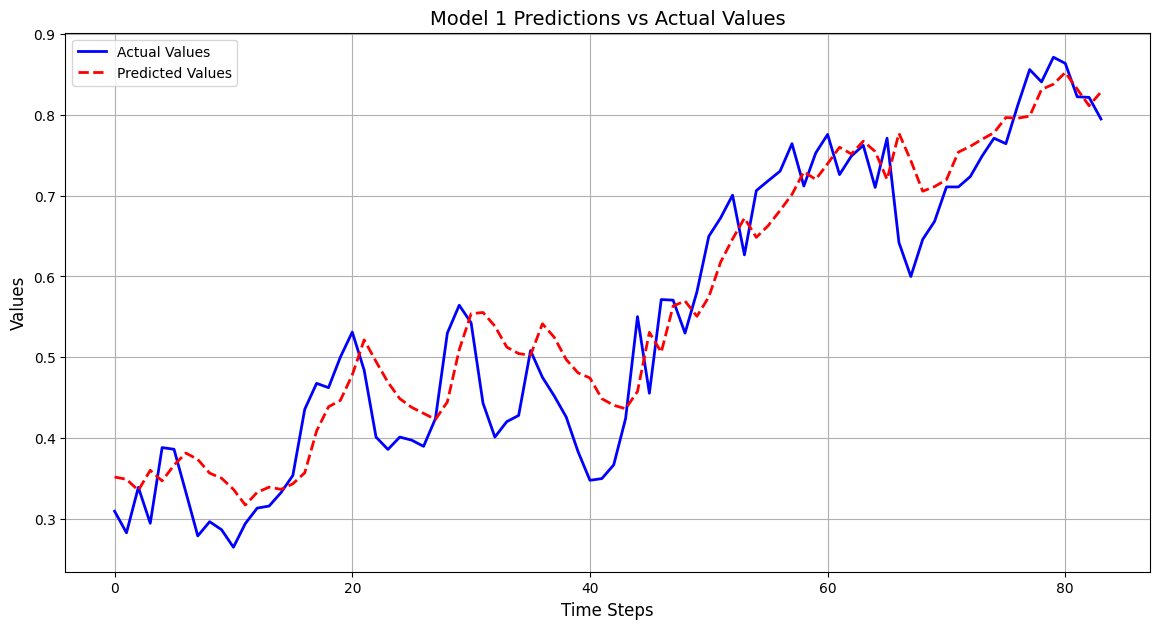

Model 2:
 - Predictions shape: (84, 1)
 - Actual values shape: (84,)
 - True values: [0.30949782 0.28275109 0.33902342 0.29456133 0.38820961 0.38611813
 0.33284813 0.27893013 0.29650655 0.28657205 0.26491994 0.29421397
 0.31331878 0.31586608 0.33242358 0.35371179 0.43558952 0.46768559
 0.46233624 0.50019849 0.53111354 0.48398836 0.40120087 0.38591703
 0.40120087 0.39737991 0.38973799 0.42412664 0.52983988 0.5643265
 0.54257642 0.44323144 0.40120087 0.42030568 0.4279476  0.50818777
 0.47518857 0.45196507 0.42603712 0.38311499 0.34770742 0.34983018
 0.36681223 0.42412664 0.55021834 0.45545852 0.57138058 0.5705968
 0.52983988 0.58078603 0.64956332 0.67248908 0.70050946 0.62663755
 0.70611354 0.71834061 0.73022804 0.76419214 0.71179039 0.75272926
 0.77565502 0.72598253 0.7489083  0.76215429 0.71011085 0.77098496
 0.6419214  0.59989083 0.64574236 0.66812227 0.71069869 0.71069869
 0.72343523 0.7489083  0.77098496 0.76419214 0.81174187 0.8558952
 0.84061135 0.87117904 0.86353712 0.82227074 0.

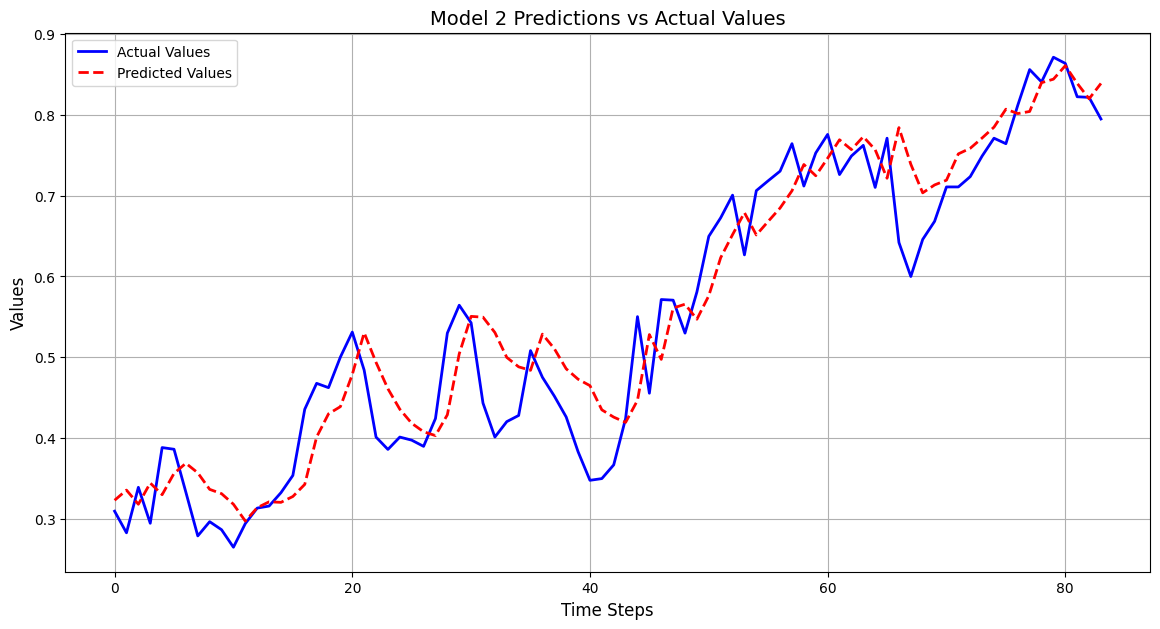

Model 3:
 - Predictions shape: (84, 1)
 - Actual values shape: (84,)
 - True values: [0.30949782 0.28275109 0.33902342 0.29456133 0.38820961 0.38611813
 0.33284813 0.27893013 0.29650655 0.28657205 0.26491994 0.29421397
 0.31331878 0.31586608 0.33242358 0.35371179 0.43558952 0.46768559
 0.46233624 0.50019849 0.53111354 0.48398836 0.40120087 0.38591703
 0.40120087 0.39737991 0.38973799 0.42412664 0.52983988 0.5643265
 0.54257642 0.44323144 0.40120087 0.42030568 0.4279476  0.50818777
 0.47518857 0.45196507 0.42603712 0.38311499 0.34770742 0.34983018
 0.36681223 0.42412664 0.55021834 0.45545852 0.57138058 0.5705968
 0.52983988 0.58078603 0.64956332 0.67248908 0.70050946 0.62663755
 0.70611354 0.71834061 0.73022804 0.76419214 0.71179039 0.75272926
 0.77565502 0.72598253 0.7489083  0.76215429 0.71011085 0.77098496
 0.6419214  0.59989083 0.64574236 0.66812227 0.71069869 0.71069869
 0.72343523 0.7489083  0.77098496 0.76419214 0.81174187 0.8558952
 0.84061135 0.87117904 0.86353712 0.82227074 0.

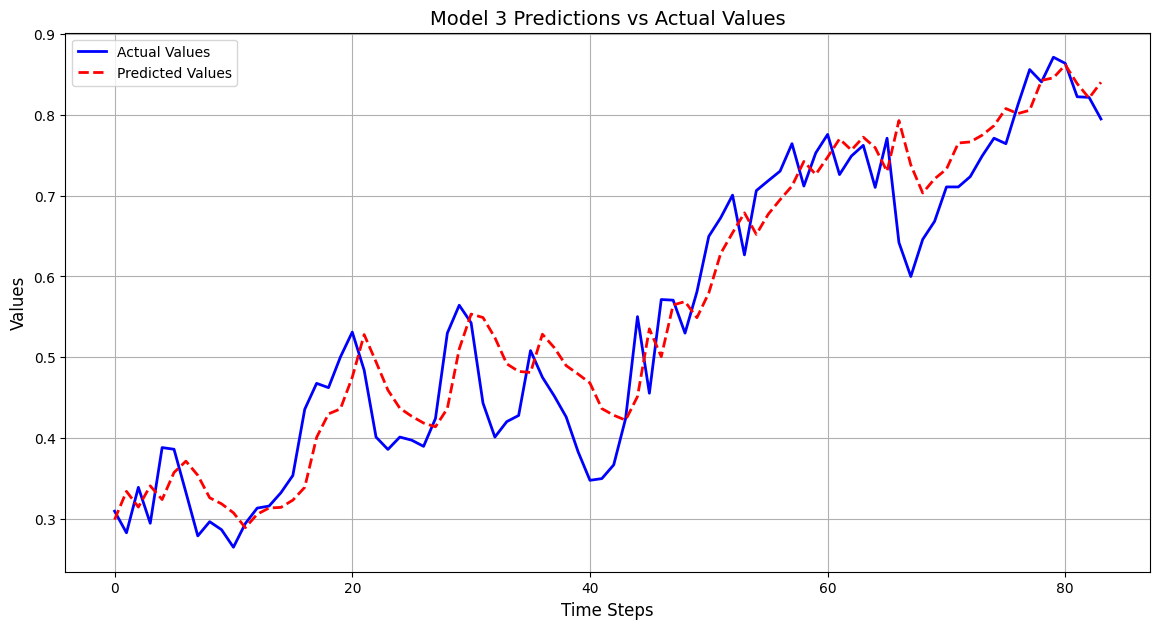

Model 4:
 - Predictions shape: (84, 1)
 - Actual values shape: (84,)
 - True values: [0.30949782 0.28275109 0.33902342 0.29456133 0.38820961 0.38611813
 0.33284813 0.27893013 0.29650655 0.28657205 0.26491994 0.29421397
 0.31331878 0.31586608 0.33242358 0.35371179 0.43558952 0.46768559
 0.46233624 0.50019849 0.53111354 0.48398836 0.40120087 0.38591703
 0.40120087 0.39737991 0.38973799 0.42412664 0.52983988 0.5643265
 0.54257642 0.44323144 0.40120087 0.42030568 0.4279476  0.50818777
 0.47518857 0.45196507 0.42603712 0.38311499 0.34770742 0.34983018
 0.36681223 0.42412664 0.55021834 0.45545852 0.57138058 0.5705968
 0.52983988 0.58078603 0.64956332 0.67248908 0.70050946 0.62663755
 0.70611354 0.71834061 0.73022804 0.76419214 0.71179039 0.75272926
 0.77565502 0.72598253 0.7489083  0.76215429 0.71011085 0.77098496
 0.6419214  0.59989083 0.64574236 0.66812227 0.71069869 0.71069869
 0.72343523 0.7489083  0.77098496 0.76419214 0.81174187 0.8558952
 0.84061135 0.87117904 0.86353712 0.82227074 0.

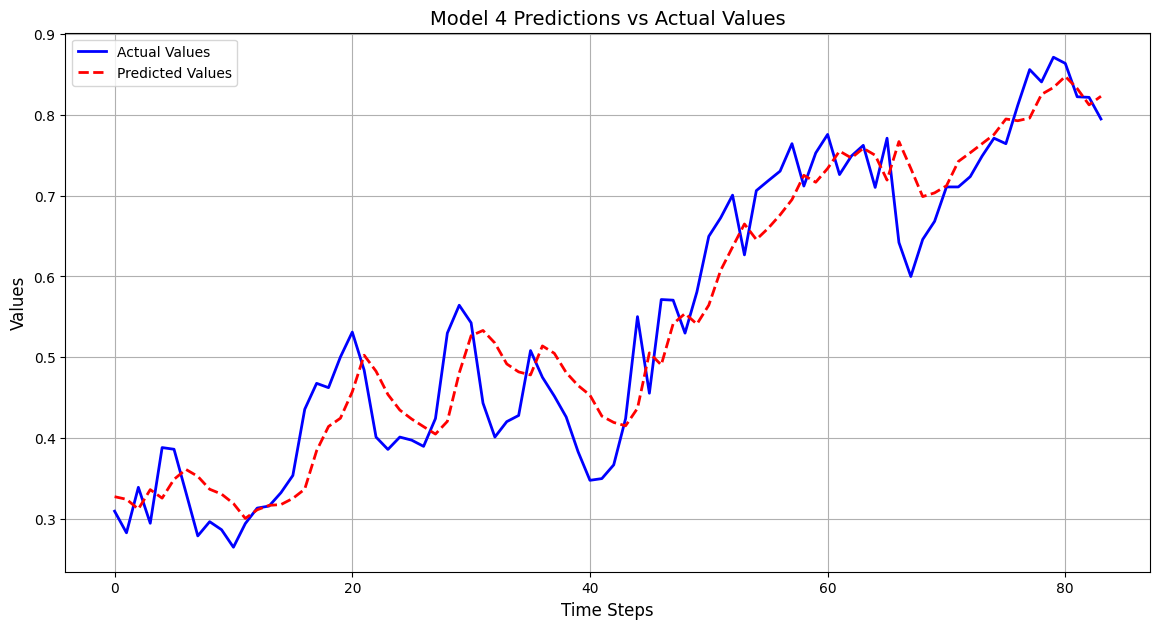

Model 5:
 - Predictions shape: (84, 1)
 - Actual values shape: (84,)
 - True values: [0.30949782 0.28275109 0.33902342 0.29456133 0.38820961 0.38611813
 0.33284813 0.27893013 0.29650655 0.28657205 0.26491994 0.29421397
 0.31331878 0.31586608 0.33242358 0.35371179 0.43558952 0.46768559
 0.46233624 0.50019849 0.53111354 0.48398836 0.40120087 0.38591703
 0.40120087 0.39737991 0.38973799 0.42412664 0.52983988 0.5643265
 0.54257642 0.44323144 0.40120087 0.42030568 0.4279476  0.50818777
 0.47518857 0.45196507 0.42603712 0.38311499 0.34770742 0.34983018
 0.36681223 0.42412664 0.55021834 0.45545852 0.57138058 0.5705968
 0.52983988 0.58078603 0.64956332 0.67248908 0.70050946 0.62663755
 0.70611354 0.71834061 0.73022804 0.76419214 0.71179039 0.75272926
 0.77565502 0.72598253 0.7489083  0.76215429 0.71011085 0.77098496
 0.6419214  0.59989083 0.64574236 0.66812227 0.71069869 0.71069869
 0.72343523 0.7489083  0.77098496 0.76419214 0.81174187 0.8558952
 0.84061135 0.87117904 0.86353712 0.82227074 0.

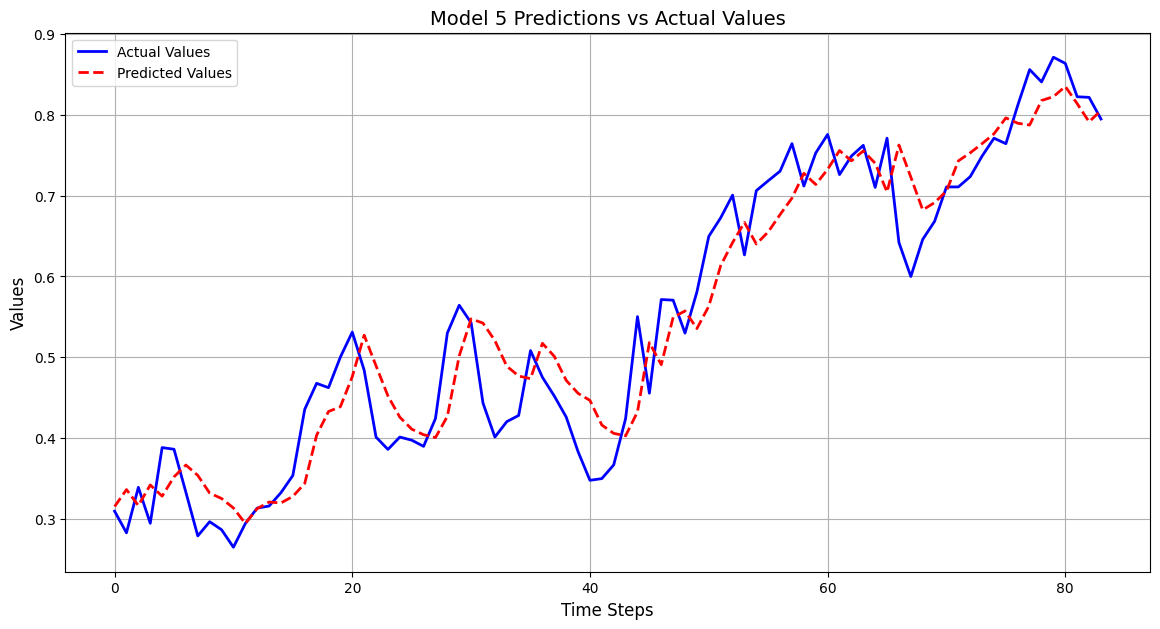

Model 6:
 - Predictions shape: (84, 1)
 - Actual values shape: (84,)
 - True values: [0.30949782 0.28275109 0.33902342 0.29456133 0.38820961 0.38611813
 0.33284813 0.27893013 0.29650655 0.28657205 0.26491994 0.29421397
 0.31331878 0.31586608 0.33242358 0.35371179 0.43558952 0.46768559
 0.46233624 0.50019849 0.53111354 0.48398836 0.40120087 0.38591703
 0.40120087 0.39737991 0.38973799 0.42412664 0.52983988 0.5643265
 0.54257642 0.44323144 0.40120087 0.42030568 0.4279476  0.50818777
 0.47518857 0.45196507 0.42603712 0.38311499 0.34770742 0.34983018
 0.36681223 0.42412664 0.55021834 0.45545852 0.57138058 0.5705968
 0.52983988 0.58078603 0.64956332 0.67248908 0.70050946 0.62663755
 0.70611354 0.71834061 0.73022804 0.76419214 0.71179039 0.75272926
 0.77565502 0.72598253 0.7489083  0.76215429 0.71011085 0.77098496
 0.6419214  0.59989083 0.64574236 0.66812227 0.71069869 0.71069869
 0.72343523 0.7489083  0.77098496 0.76419214 0.81174187 0.8558952
 0.84061135 0.87117904 0.86353712 0.82227074 0.

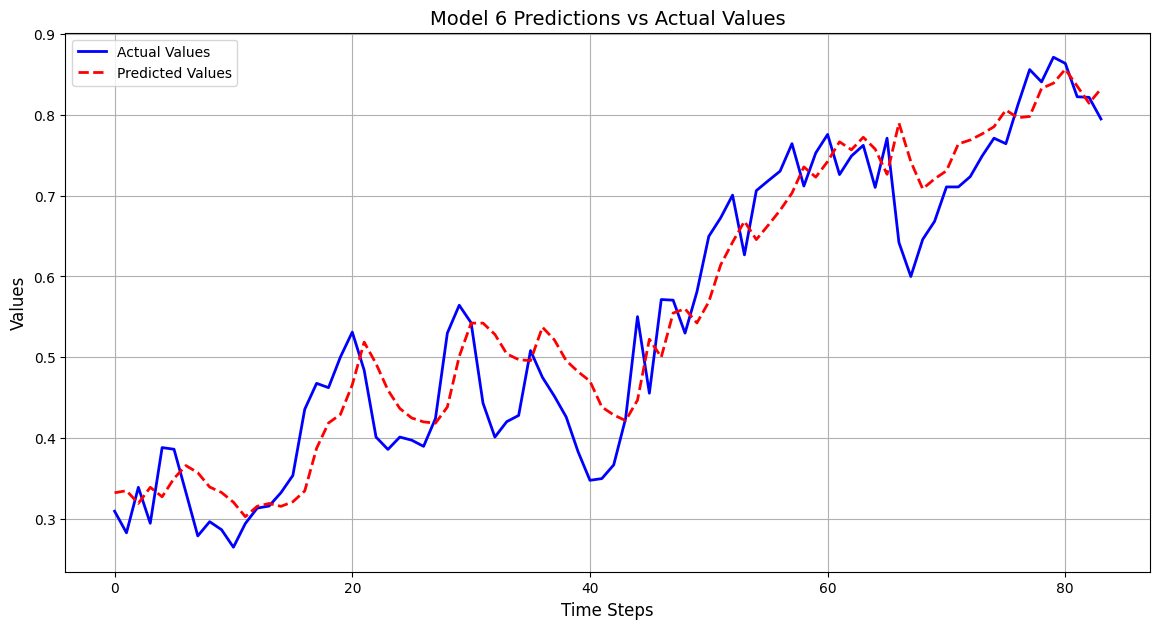

Model 7:
 - Predictions shape: (84, 1)
 - Actual values shape: (84,)
 - True values: [0.30949782 0.28275109 0.33902342 0.29456133 0.38820961 0.38611813
 0.33284813 0.27893013 0.29650655 0.28657205 0.26491994 0.29421397
 0.31331878 0.31586608 0.33242358 0.35371179 0.43558952 0.46768559
 0.46233624 0.50019849 0.53111354 0.48398836 0.40120087 0.38591703
 0.40120087 0.39737991 0.38973799 0.42412664 0.52983988 0.5643265
 0.54257642 0.44323144 0.40120087 0.42030568 0.4279476  0.50818777
 0.47518857 0.45196507 0.42603712 0.38311499 0.34770742 0.34983018
 0.36681223 0.42412664 0.55021834 0.45545852 0.57138058 0.5705968
 0.52983988 0.58078603 0.64956332 0.67248908 0.70050946 0.62663755
 0.70611354 0.71834061 0.73022804 0.76419214 0.71179039 0.75272926
 0.77565502 0.72598253 0.7489083  0.76215429 0.71011085 0.77098496
 0.6419214  0.59989083 0.64574236 0.66812227 0.71069869 0.71069869
 0.72343523 0.7489083  0.77098496 0.76419214 0.81174187 0.8558952
 0.84061135 0.87117904 0.86353712 0.82227074 0.

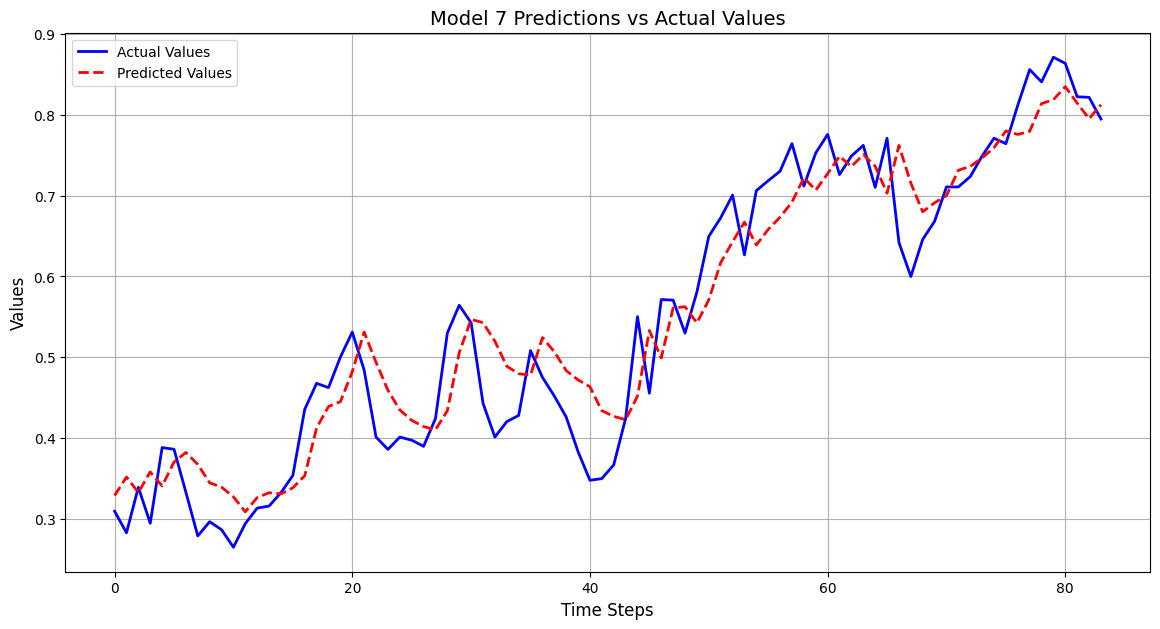

Model 8:
 - Predictions shape: (84, 1)
 - Actual values shape: (84,)
 - True values: [0.30949782 0.28275109 0.33902342 0.29456133 0.38820961 0.38611813
 0.33284813 0.27893013 0.29650655 0.28657205 0.26491994 0.29421397
 0.31331878 0.31586608 0.33242358 0.35371179 0.43558952 0.46768559
 0.46233624 0.50019849 0.53111354 0.48398836 0.40120087 0.38591703
 0.40120087 0.39737991 0.38973799 0.42412664 0.52983988 0.5643265
 0.54257642 0.44323144 0.40120087 0.42030568 0.4279476  0.50818777
 0.47518857 0.45196507 0.42603712 0.38311499 0.34770742 0.34983018
 0.36681223 0.42412664 0.55021834 0.45545852 0.57138058 0.5705968
 0.52983988 0.58078603 0.64956332 0.67248908 0.70050946 0.62663755
 0.70611354 0.71834061 0.73022804 0.76419214 0.71179039 0.75272926
 0.77565502 0.72598253 0.7489083  0.76215429 0.71011085 0.77098496
 0.6419214  0.59989083 0.64574236 0.66812227 0.71069869 0.71069869
 0.72343523 0.7489083  0.77098496 0.76419214 0.81174187 0.8558952
 0.84061135 0.87117904 0.86353712 0.82227074 0.

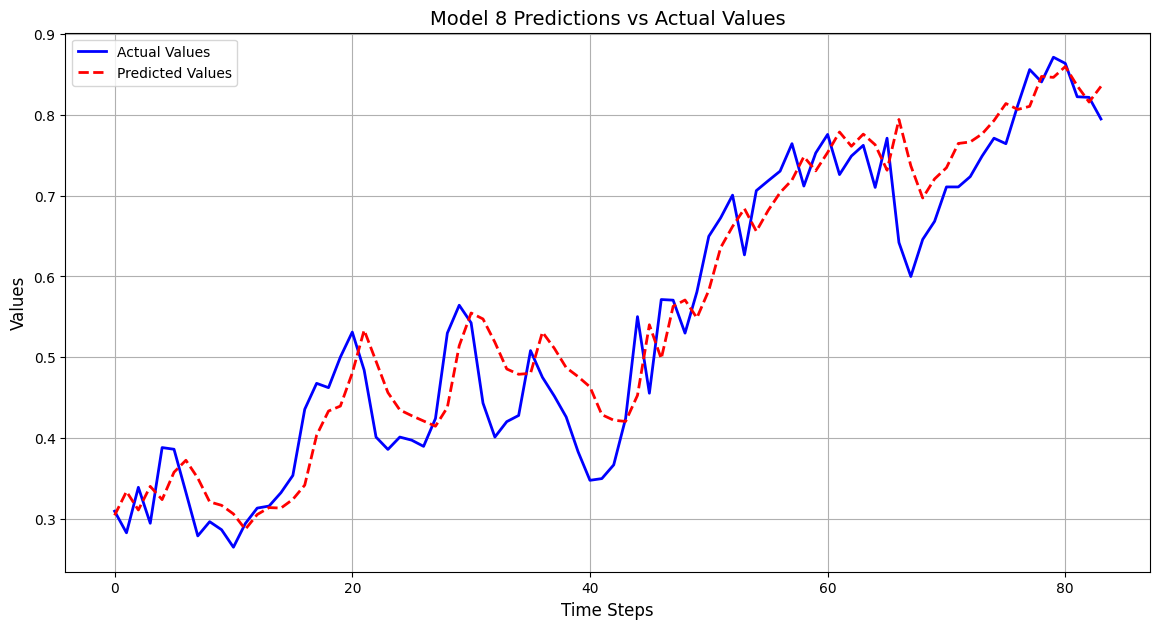

Model 9:
 - Predictions shape: (84, 1)
 - Actual values shape: (84,)
 - True values: [0.30949782 0.28275109 0.33902342 0.29456133 0.38820961 0.38611813
 0.33284813 0.27893013 0.29650655 0.28657205 0.26491994 0.29421397
 0.31331878 0.31586608 0.33242358 0.35371179 0.43558952 0.46768559
 0.46233624 0.50019849 0.53111354 0.48398836 0.40120087 0.38591703
 0.40120087 0.39737991 0.38973799 0.42412664 0.52983988 0.5643265
 0.54257642 0.44323144 0.40120087 0.42030568 0.4279476  0.50818777
 0.47518857 0.45196507 0.42603712 0.38311499 0.34770742 0.34983018
 0.36681223 0.42412664 0.55021834 0.45545852 0.57138058 0.5705968
 0.52983988 0.58078603 0.64956332 0.67248908 0.70050946 0.62663755
 0.70611354 0.71834061 0.73022804 0.76419214 0.71179039 0.75272926
 0.77565502 0.72598253 0.7489083  0.76215429 0.71011085 0.77098496
 0.6419214  0.59989083 0.64574236 0.66812227 0.71069869 0.71069869
 0.72343523 0.7489083  0.77098496 0.76419214 0.81174187 0.8558952
 0.84061135 0.87117904 0.86353712 0.82227074 0.

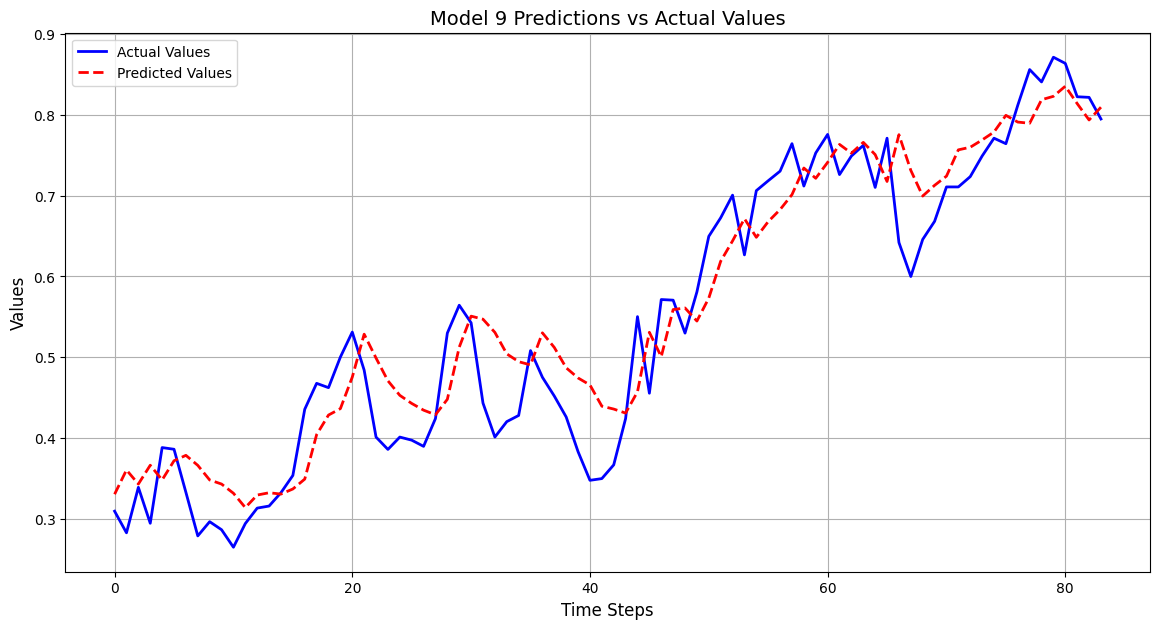

Model 10:
 - Predictions shape: (84, 1)
 - Actual values shape: (84,)
 - True values: [0.30949782 0.28275109 0.33902342 0.29456133 0.38820961 0.38611813
 0.33284813 0.27893013 0.29650655 0.28657205 0.26491994 0.29421397
 0.31331878 0.31586608 0.33242358 0.35371179 0.43558952 0.46768559
 0.46233624 0.50019849 0.53111354 0.48398836 0.40120087 0.38591703
 0.40120087 0.39737991 0.38973799 0.42412664 0.52983988 0.5643265
 0.54257642 0.44323144 0.40120087 0.42030568 0.4279476  0.50818777
 0.47518857 0.45196507 0.42603712 0.38311499 0.34770742 0.34983018
 0.36681223 0.42412664 0.55021834 0.45545852 0.57138058 0.5705968
 0.52983988 0.58078603 0.64956332 0.67248908 0.70050946 0.62663755
 0.70611354 0.71834061 0.73022804 0.76419214 0.71179039 0.75272926
 0.77565502 0.72598253 0.7489083  0.76215429 0.71011085 0.77098496
 0.6419214  0.59989083 0.64574236 0.66812227 0.71069869 0.71069869
 0.72343523 0.7489083  0.77098496 0.76419214 0.81174187 0.8558952
 0.84061135 0.87117904 0.86353712 0.82227074 0

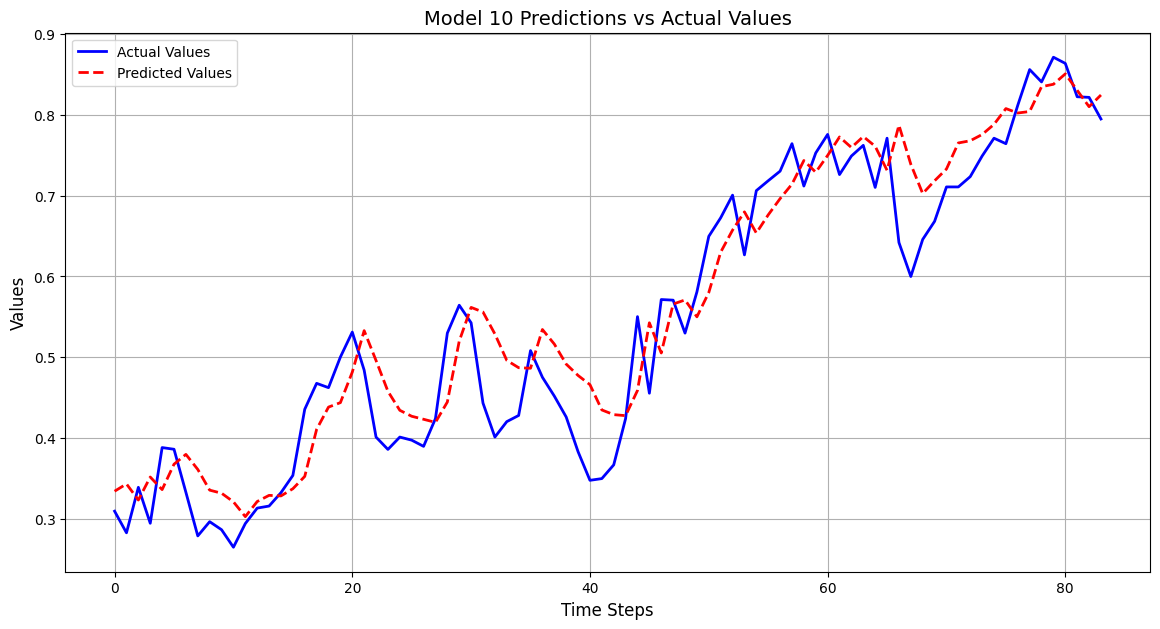

In [14]:
# Now we will plot predictions for each model individually with both actual and predicted values
for i, predictions in enumerate(model_predictions):
    plt.figure(figsize=(14, 7))

    # Check shapes of actual and predicted values
    print(f"Model {i + 1}:")
    print(f" - Predictions shape: {predictions.shape}")
    print(f" - Actual values shape: {y_test.shape}")

    # Select a range from the test set for visualization
    start_index = 0  # Change this index to visualize different starting points
    sequence_length = 100  # The length of the sequence to visualize

    # Ensure we get the correct length for comparison
    true_values = y_test[start_index:start_index + sequence_length].reshape(-1)
    predicted_values = predictions[start_index:start_index + sequence_length].reshape(-1)

    # Debug: Print values to inspect
    print(f" - True values: {true_values}")
    print(f" - Predicted values: {predicted_values}")

    # Check if true_values and predicted_values are empty
    if true_values.size == 0 or predicted_values.size == 0:
        print(f"Empty values for Model {i + 1}.")
        continue  # Skip to the next iteration if empty

    # Plot actual values
    plt.plot(true_values, label='Actual Values', color='blue', linewidth=2)
    # Plot predicted values
    plt.plot(predicted_values, label='Predicted Values', color='red', linestyle='--', linewidth=2)

    plt.title(f'Model {i + 1} Predictions vs Actual Values', fontsize=14)
    plt.xlabel('Time Steps', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.legend()
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.grid()
    plt.show()

# **Model Comparison**

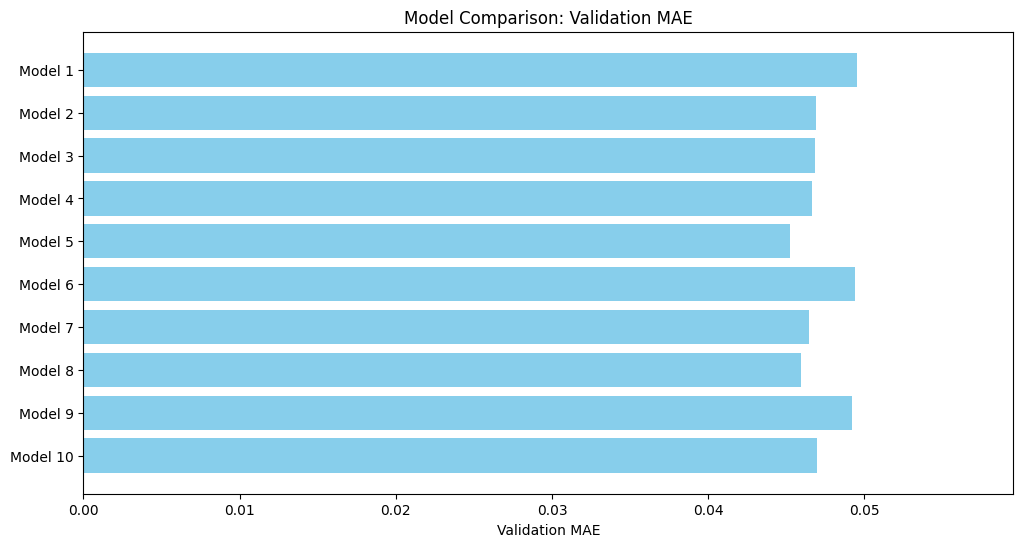

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
model_names = [f"Model {i+1}" for i in range(len(model_mae_scores))]
mae_scores = model_mae_scores

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh(model_names, mae_scores, color='skyblue')
plt.xlabel('Validation MAE')
plt.title('Model Comparison: Validation MAE')
plt.xlim(0, max(mae_scores) + 0.01)  # Set limit for better visualization
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()